# Exploratory Data Analysis

Updated: 11/2/25

## Purpose

This notebook is used to explore and comment on the quality of the data collected as part of the 10/26/25 Context Report. We will explore and analyze each of the datasets collected individually, and we will look to combine them in some meaningful way.

### Read in Data

In [ ]:
import pandas as pd
import numpy as np

well_info = pd.read_excel('../data/well_information.xls')
well_owners = pd.read_excel('../data/well_owners_list.xls')

quarters_2020 = pd.read_excel('../data/quarterly/2020_AllQtrs_FINAL_11172022.xlsx')
quarters_2021 = pd.read_excel('../data/quarterly/2021_AllQtrs_FINAL_11172022.xlsx')
quarters_2022 = pd.read_excel('../data/quarterly/2022_AllQtrs_FINAL_03032023.xlsx')
quarters_2023 = pd.read_excel('../data/quarterly/2023_AllQtrs_FINAL_05312024.xlsx')
quarters_2024 = pd.read_excel('../data/quarterly/2024_AllQtrs.xlsx')
quarters_2025 = pd.read_excel('../data/quarterly/2025_AllQtrs_FINAL_08202025.xlsx')

annual_2010 = pd.read_excel('../data/annual/Combined Production 2010.xlsx')
annual_2011 = pd.read_excel('../data/annual/Combined Production 2011.xlsx')
annual_2012 = pd.read_excel('../data/annual/Combined Production 2012.xlsx')
annual_2013 = pd.read_excel('../data/annual/Combined Production 2013.xlsx')
annual_2014 = pd.read_excel('../data/annual/Combined Production 2014.xlsx')
annual_2015 = pd.read_excel('../data/annual/Combined Production 2015.xlsx')
annual_2016 = pd.read_excel('../data/annual/Combined Production 2016.xlsx')
annual_2017 = pd.read_excel('../data/annual/Combined Production 2017.xlsx')
annual_2018 = pd.read_excel('../data/annual/2018_Horizontal_and_Vertical_Production_08292022.xlsx')
annual_2019 = pd.read_excel('../data/annual/2019_Horizontal_and_Vertical_Production_11172022.xlsx')
annual_2020 = pd.read_excel('../data/annual/2020_Horizontal_and_Vertical_Production_11172022.xlsx')
annual_2021 = pd.read_excel('../data/annual/2021_Horizontal_and_Vertical_Production_03202024.xlsx')
annual_2022 = pd.read_excel('../data/annual/2022_Horizontal_and_Vertical_Production_1228223.xlsx')
annual_2023 = pd.read_excel('../data/annual/2023_Horizontal_and_Vertical_Production_07022025.xlsx')
annual_2024 = pd.read_excel('../data/annual/2024_Horizontal_and_Vertical_Production_07022025.xlsx')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Quarterly Production

We want to combine the quarterly production files into one dataset.

In [2]:
# Ensure the columns are consistent across all quarterly dataframes
quarterly_dfs = [quarters_2020, quarters_2021, quarters_2022, quarters_2023, quarters_2024, quarters_2025]
for i in range(1, len(quarterly_dfs)):
    for j in range(1, i):
        if not quarterly_dfs[i].columns.equals(quarterly_dfs[j].columns):
            print(f"Columns for quarterly dataframe {i} do not match the quarterly dataframe {j}.")

# The columns don't match, let's see why
for i in range(len(quarterly_dfs)):
    print(f"Quarterly dataframe {i} columns: {quarterly_dfs[i].columns.tolist()}")

# For 2020-2022, we need to change 'Quarter' to 'Quarter (1, 2, 3, 4, n/a)' and change 'Days' to 'Days in Production'
quarters_2020 = quarters_2020.rename(columns={'Quarter': 'Quarter (1, 2, 3, 4, n/a)', 'Days': 'Days in Production'})
quarters_2021 = quarters_2021.rename(columns={'Quarter': 'Quarter (1, 2, 3, 4, n/a)', 'Days': 'Days in Production'})
quarters_2022 = quarters_2022.rename(columns={'Quarter': 'Quarter (1, 2, 3, 4, n/a)', 'Days': 'Days in Production'})

# Recheck columns
quarterly_dfs = [quarters_2020, quarters_2021, quarters_2022, quarters_2023, quarters_2024, quarters_2025]
for i in range(1, len(quarterly_dfs)):
    for j in range(1, i):
        if not quarterly_dfs[i].columns.equals(quarterly_dfs[j].columns):
            print(f"Columns for quarterly dataframe {i} do not match the quarterly dataframe {j}.")

Columns for quarterly dataframe 3 do not match the quarterly dataframe 1.
Columns for quarterly dataframe 3 do not match the quarterly dataframe 2.
Columns for quarterly dataframe 4 do not match the quarterly dataframe 1.
Columns for quarterly dataframe 4 do not match the quarterly dataframe 2.
Columns for quarterly dataframe 5 do not match the quarterly dataframe 1.
Columns for quarterly dataframe 5 do not match the quarterly dataframe 2.
Quarterly dataframe 0 columns: ['API Number', 'Production Year', 'Quarter', 'Owner Name', 'County', 'Township', 'Well Name and Number', 'Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)', 'Days', 'Date of First Production']
Quarterly dataframe 1 columns: ['API Number', 'Production Year', 'Quarter', 'Owner Name', 'County', 'Township', 'Well Name and Number', 'Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)', 'Days', 'Date of First Production']
Quarterly dataframe 2 columns: ['API Number', 'Production Year', 'Quarter', 'Owner Name', 'County', 'Township', 'Well Name and

In [3]:
# Concatenate all quarterly dataframes
quarterly_production = pd.concat(quarterly_dfs, ignore_index=True)
display(quarterly_production.head(5))
print(quarterly_production.shape)
print(quarterly_production.dtypes)

,API Number,Production Year,"Quarter (1, 2, 3, 4, n/a)",Owner Name,County,Township,Well Name and Number,Oil (Bbls),Gas (Mcf),Brine (Bbls),Days in Production,Date of First Production
0,34013209230000,2020,1,ANTERO RESOURCES CORPORATION,BELMONT,KIRKWOOD,HORSESHOE UNIT 1H,0,0,0,91,NaT
1,34059242520100,2020,1,ANTERO RESOURCES CORPORATION,GUERNSEY,MILLWOOD,J ANDERSON 1H,130,31334,324,91,2013-11-11
2,34059242530000,2020,1,ANTERO RESOURCES CORPORATION,GUERNSEY,MILLWOOD,J ANDERSON 5H,158,46773,209,91,2013-11-13
3,34059242540000,2020,1,ANTERO RESOURCES CORPORATION,GUERNSEY,MILLWOOD,J ANDERSON 3H,103,28393,254,91,2013-11-13
4,34059242550000,2020,1,ANTERO RESOURCES CORPORATION,GUERNSEY,MILLWOOD,J ANDERSON 2H,92,27276,242,91,2013-11-11


(68326, 12)
API Number                            int64
Production Year                       int64
Quarter (1, 2, 3, 4, n/a)             int64
Owner Name                           object
County                               object
Township                             object
Well Name and Number                 object
Oil (Bbls)                            int64
Gas (Mcf)                             int64
Brine (Bbls)                          int64
Days in Production                    int64
Date of First Production     datetime64[ns]
dtype: object


In [4]:
quarterly_production.describe()

,API Number,Production Year,"Quarter (1, 2, 3, 4, n/a)",Oil (Bbls),Gas (Mcf),Brine (Bbls),Days in Production,Date of First Production
count,6.832600e+04,68326.000000,68326.000000,68326.000000,6.832600e+04,68326.000000,68326.000000,66681
mean,3.405764e+13,2022.440389,2.414732,2089.591781,1.755252e+05,2773.311302,84.935764,2017-04-02 14:38:17.853961472
min,3.401321e+13,2020.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,2007-11-26 00:00:00
25%,3.401922e+13,2021.000000,1.000000,0.000000,3.006325e+04,276.000000,90.000000,2014-11-29 00:00:00
50%,3.405925e+13,2023.000000,2.000000,0.000000,6.475750e+04,787.000000,91.000000,2016-12-23 00:00:00
75%,3.408121e+13,2024.000000,3.000000,488.000000,1.749745e+05,2419.000000,92.000000,2019-04-24 00:00:00
max,3.416926e+13,2025.000000,4.000000,195194.000000,4.433897e+06,196980.000000,3919.000000,2025-08-18 00:00:00
std,3.937510e+10,1.599052,1.113446,9195.877042,3.453987e+05,6620.126847,24.313355,NaN


In [5]:
quarterly_production['Quarter (1, 2, 3, 4, n/a)'].value_counts()

Quarter (1, 2, 3, 4, n/a)
2    18808
1    18414
4    15647
3    15457
Name: count, dtype: int64

In [6]:
counts = quarterly_production.groupby(['API Number', 'Production Year', 'Quarter (1, 2, 3, 4, n/a)']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
counts[counts['counts'] > 1]

,API Number,Production Year,"Quarter (1, 2, 3, 4, n/a)",counts
20387,34019224510000,2021,3,2
19925,34019224110000,2021,3,2
5012,34013209650000,2022,3,2
4770,34013209510000,2022,3,2
2490,34013208090000,2022,3,2
...,...,...,...,...
7124,34013210970000,2022,3,2
8165,34013211470000,2022,3,2
21333,34019225280000,2021,3,2
35433,34067210900000,2020,1,2


In [7]:
quarterly_production[quarterly_production[['API Number', 'Production Year', 'Quarter (1, 2, 3, 4, n/a)']].duplicated(keep=False)].sort_values(by=['API Number', 'Production Year', 'Quarter (1, 2, 3, 4, n/a)'])

,API Number,Production Year,"Quarter (1, 2, 3, 4, n/a)",Owner Name,County,Township,Well Name and Number,Oil (Bbls),Gas (Mcf),Brine (Bbls),Days in Production,Date of First Production
28106,34013206530000,2022,3,ASCENT RESOURCES UTICA LLC,BELMONT,MEAD,KALDOR 2H,0,0,77,0,2014-01-10
30914,34013206530000,2022,3,XTO ENERGY INC.,BELMONT,MEAD,KALDOR 2H,0,0,0,0,2014-01-10
28107,34013206540100,2022,3,ASCENT RESOURCES UTICA LLC,BELMONT,MEAD,KALDOR 1H,0,22905,574,61,2013-12-10
30915,34013206540100,2022,3,XTO ENERGY INC.,BELMONT,MEAD,KALDOR 1H,0,10763,237,31,2013-12-10
28125,34013207670000,2022,3,ASCENT RESOURCES UTICA LLC,BELMONT,RICHLAND,COOK UNIT 2H,0,57533,554,61,2015-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...
53762,34111248760000,2024,2,RICE DRILLING D LLC,MONROE,OHIO,R & D HILLTOP LUMBER N U2H,0,146017,2461,30,2022-11-30
52875,34111248880000,2024,2,EQUINOR USA ONSHORE PROPERTIES,MONROE,OHIO,WEFLER S U2H,0,230795,3759,50,2020-11-20
53763,34111248880000,2024,2,RICE DRILLING D LLC,MONROE,OHIO,WEFLER S U2H,0,35431,157,5,2020-11-20
52876,34111248890000,2024,2,EQUINOR USA ONSHORE PROPERTIES,MONROE,OHIO,WEFLER S U1H,0,0,0,1,2020-11-19


In [8]:
counts_2 = quarterly_production.groupby(['API Number', 'Production Year', 'Quarter (1, 2, 3, 4, n/a)', 'Owner Name']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
counts_2[counts_2['counts'] > 1]

,API Number,Production Year,"Quarter (1, 2, 3, 4, n/a)",Owner Name,counts


In [9]:
# No production, no days in production
print(quarterly_production[(quarterly_production['Oil (Bbls)'] == 0) & (quarterly_production['Gas (Mcf)'] == 0) & (quarterly_production['Brine (Bbls)'] == 0) & (quarterly_production['Days in Production'] == 0)].shape)
# No production, some days in production
print(quarterly_production[(quarterly_production['Oil (Bbls)'] == 0) & (quarterly_production['Gas (Mcf)'] == 0) & (quarterly_production['Brine (Bbls)'] == 0) & (quarterly_production['Days in Production'] > 0)].shape)

(1603, 12)
(240, 12)


In [10]:
# Oil, gas, or brine production equal to zero
print(quarterly_production[(quarterly_production['Oil (Bbls)'] == 0)].shape)
print(quarterly_production[(quarterly_production['Gas (Mcf)'] == 0)].shape)
print(quarterly_production[(quarterly_production['Brine (Bbls)'] == 0)].shape)

(35584, 12)
(2079, 12)
(3438, 12)


c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

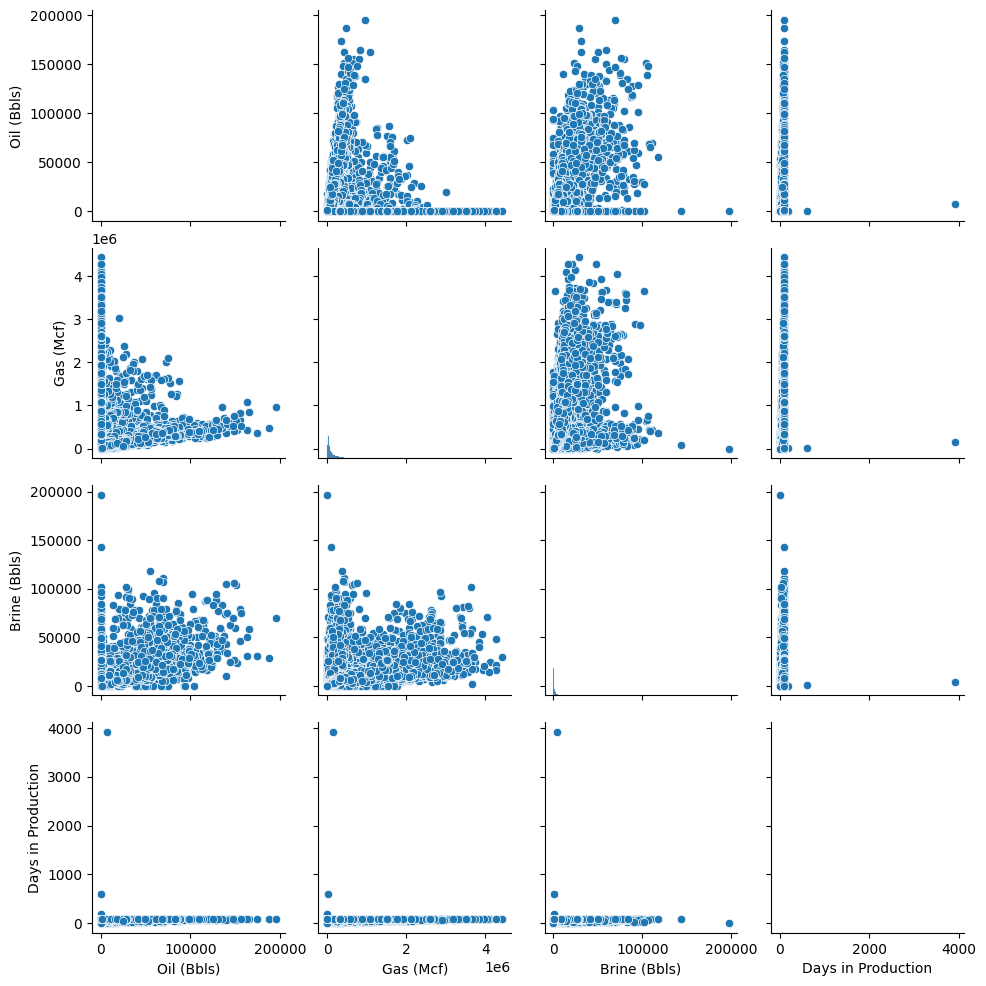

In [11]:
import seaborn as sns

sns.pairplot(quarterly_production[['Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)', 'Days in Production']])

c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

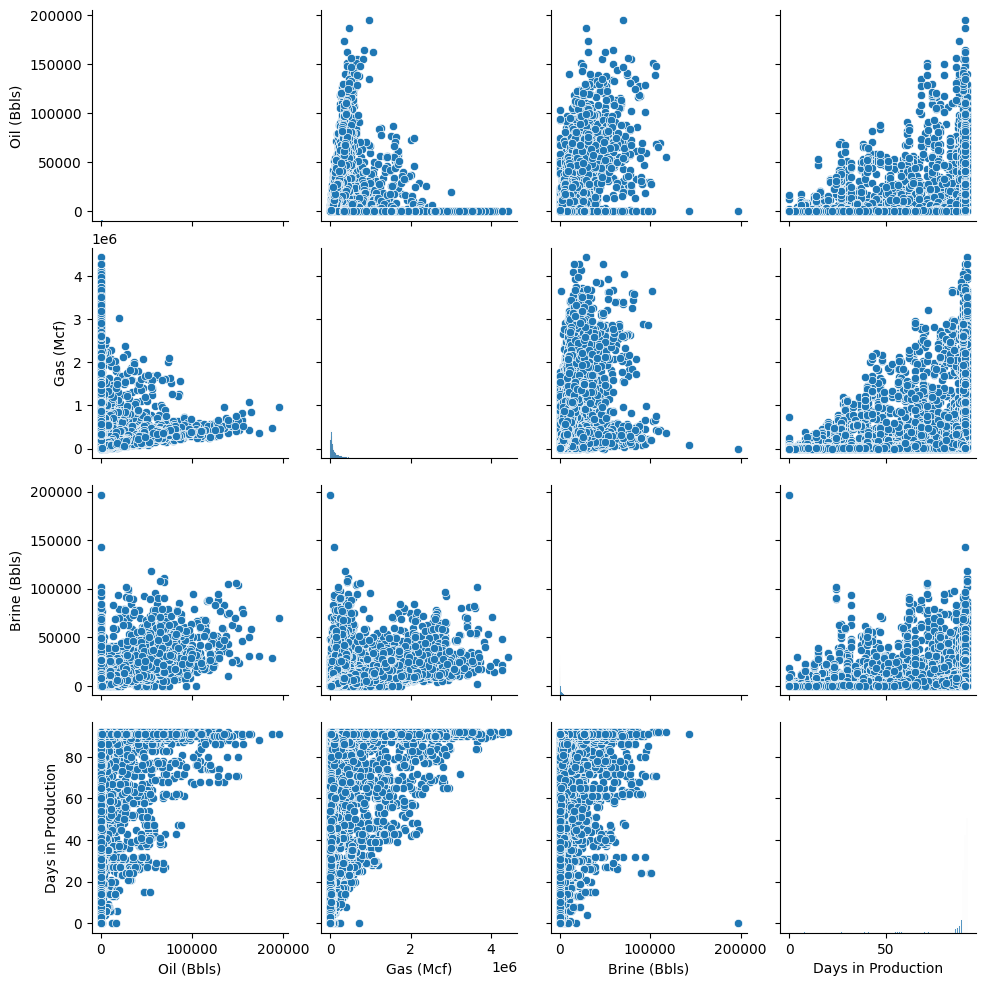

In [12]:
# Remove clear outliers in days in production
quarterly_production = quarterly_production[quarterly_production['Days in Production'] <= 92]

sns.pairplot(quarterly_production[['Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)', 'Days in Production']])

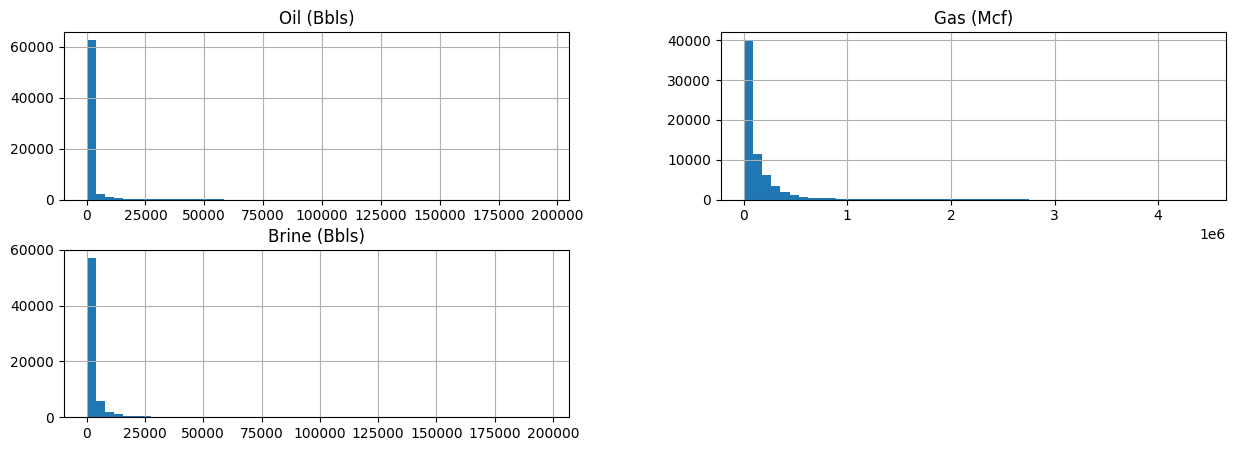

In [13]:
import matplotlib.pyplot as plt
# Make histograms of production values
quarterly_production[['Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)']].hist(bins=50, figsize=(15, 5))
plt.show()

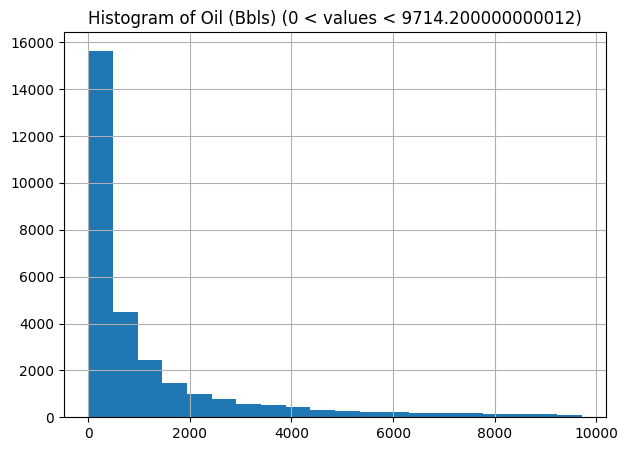

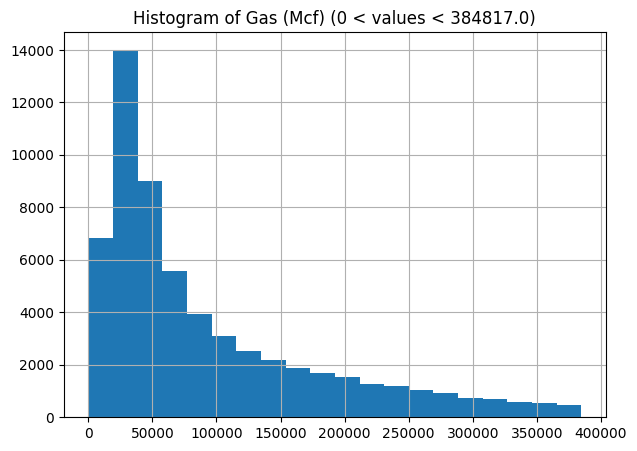

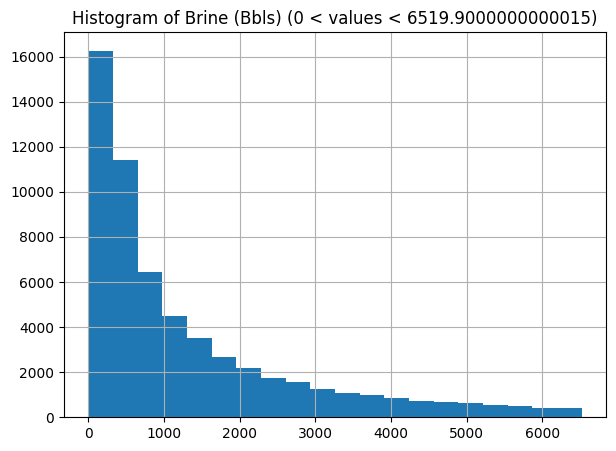

In [14]:
thresholds = {}

for col in ['Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)']:
    thresholds[col] = np.percentile(quarterly_production[col][quarterly_production[col] > 0], 90)
    quarterly_production.loc[(quarterly_production[col] > 0) & (quarterly_production[col] < thresholds[col]), col].hist(bins=20, figsize=(7, 5))
    plt.title(f'Histogram of {col} (0 < values < {thresholds[col]})')
    plt.show()

#### Notes from the Numerical Summary

* We can see that the `quarter` column is numeric - there are no n/a values. Each row in the table corresponds with one well's production for one quarter.
* There are duplicate records for some quarter/well/year combinations. These duplicates seem to be cases where the Owner Name is different - likely corresponding with the sale of a well.
  + This can likely be checked with the permit plug dataset.
  + These records do not necessarily need to be removed, but that is an option to consider.
* 1843 rows have no production associated with them. 1603 of those have no production days. We likely should not remove those, but we may want to add a flag. The other 240 may need to be removed.
* Some of the wells do not produce oil, some do not produce gas, and some do not produce oil.
  + 35584 rows have no oil production.
  + 2079 rows have no gas production (not many more than the total with no production).
  + 3428 rows have no brine production.
* We see severe right skew in the production values. Most wells are producing very little.
* Even when filtering to the bottom 90% of values for each column (not including 0), there is severe right skew. Most wells produce very little.

### Annual Production

We want to combine the annual production records into one dataset.

In [15]:
# Ensure all annual dataframes have the same columns
annual_dfs = [annual_2010, annual_2011, annual_2012, annual_2013, annual_2014, annual_2015, annual_2016, annual_2017, annual_2018, annual_2019, annual_2020, annual_2021, annual_2022, annual_2023, annual_2024]
annual_dfs_names = ['annual_2010', 'annual_2011', 'annual_2012', 'annual_2013', 'annual_2014', 'annual_2015', 'annual_2016', 'annual_2017', 'annual_2018', 'annual_2019', 'annual_2020', 'annual_2021', 'annual_2022', 'annual_2023', 'annual_2024']
for i in range(1, len(annual_dfs)):
    for j in range(1, i):
        if not annual_dfs[i].columns.equals(annual_dfs[j].columns):
            print(f"Columns for annual dataframe {annual_dfs_names[i]} do not match the annual dataframe {annual_dfs_names[j]}.")

# Looks like columns for annual_2010 to annual_2017 do not match those for annual_2018 to annual_2024. Let's inspect further.
print(annual_2010.columns.tolist())
print(annual_2018.columns.tolist())
print(annual_2020.columns.tolist())
print(annual_2024.columns.tolist())

# Let's standardize these to match the quarterly production columns
annual_early = pd.concat(annual_dfs[:8], ignore_index=True)
annual_late = pd.concat(annual_dfs[9:13], ignore_index=True)
annual_really_late = pd.concat(annual_dfs[13:], ignore_index=True)
annual_early['Well Name and Number'] = annual_early['WELL NAME'] + ' ' + annual_early['WELL NUMBER']
annual_early = annual_early.rename(columns={
    'PRODUCTION YEAR': 'Production Year',
    'QUARTER: N/A, 1, 2, 3, 4': 'Quarter (1, 2, 3, 4, n/a)',
    'OWNER NAME': 'Owner Name',
    'API WELL NUMBER': 'API Number',
    'COUNTY': 'County',
    'TOWNSHIP': 'Township',
    'OIL': 'Oil (Bbls)',
    'GAS': 'Gas (Mcf)',
    'BRINE': 'Brine (Bbls)',
    'Days': 'Days in Production',
    'DATE OF FIRST PRODUCTION': 'Date of First Production',
}).drop(columns=['WELL NAME', 'WELL NUMBER'])
annual_2018 = annual_2018.rename(columns={
    'Quarter 1, 2, 3, 4, n/a': 'Quarter (1, 2, 3, 4, n/a)',
    'Days': 'Days in Production',
})
annual_late = annual_late.rename(columns={'Days': 'Days in Production'})

print(annual_early.columns.tolist())
print(annual_2018.columns.tolist())
print(annual_late.columns.tolist())
print(annual_really_late.columns.tolist())

annual_production = pd.concat([annual_early, annual_2018, annual_late, annual_really_late], ignore_index=True)
display(annual_production.head(5))

Columns for annual dataframe annual_2018 do not match the annual dataframe annual_2011.
Columns for annual dataframe annual_2018 do not match the annual dataframe annual_2012.
Columns for annual dataframe annual_2018 do not match the annual dataframe annual_2013.
Columns for annual dataframe annual_2018 do not match the annual dataframe annual_2014.
Columns for annual dataframe annual_2018 do not match the annual dataframe annual_2015.
Columns for annual dataframe annual_2018 do not match the annual dataframe annual_2016.
Columns for annual dataframe annual_2018 do not match the annual dataframe annual_2017.
Columns for annual dataframe annual_2019 do not match the annual dataframe annual_2011.
Columns for annual dataframe annual_2019 do not match the annual dataframe annual_2012.
Columns for annual dataframe annual_2019 do not match the annual dataframe annual_2013.
Columns for annual dataframe annual_2019 do not match the annual dataframe annual_2014.
Columns for annual dataframe ann

,Production Year,"Quarter (1, 2, 3, 4, n/a)",Owner Name,API Number,County,Township,Oil (Bbls),Gas (Mcf),Brine (Bbls),Days in Production,Date of First Production,Well Name and Number
0,2010,NaN,AB RESOURCES OH LLC,34005200230000,ASHLAND,PERRY,0.0,0.0,0.0,365.0,NaT,AGNES McKINEY (MORR) 1-582 1-582
1,2010,NaN,Hottel Oil & Gas LLC,34005200330000,ASHLAND,JACKSON,0.0,0.0,0.0,0.0,NaT,HEFFELINGER 1-5874 1-5874
2,2010,NaN,SHORTS RALPH E DRILLING,34005200580000,ASHLAND,JACKSON,33.0,0.0,12.0,365.0,NaT,STANISLAWSKI 1 1
3,2010,NaN,AB RESOURCES OH LLC,34005200690000,ASHLAND,MOHICAN,0.0,0.0,0.0,365.0,NaT,HOYLAND B AUSTIN(CRUMLICK) 1 1
4,2010,NaN,Hottel Oil & Gas LLC,34005201080000,ASHLAND,JACKSON,0.0,1124.0,0.0,365.0,NaT,L. HALL 1 1


In [16]:
# Basic description
print(annual_production.shape)
print(annual_production.dtypes)
annual_production.describe()

(864289, 12)
Production Year                       int64
Quarter (1, 2, 3, 4, n/a)           float64
Owner Name                           object
API Number                            int64
County                               object
Township                             object
Oil (Bbls)                          float64
Gas (Mcf)                           float64
Brine (Bbls)                        float64
Days in Production                  float64
Date of First Production     datetime64[ns]
Well Name and Number                 object
dtype: object


,Production Year,"Quarter (1, 2, 3, 4, n/a)",API Number,Oil (Bbls),Gas (Mcf),Brine (Bbls),Days in Production,Date of First Production
count,864289.000000,100081.000000,8.642890e+05,864092.000000,8.640360e+05,863276.000000,842548.000000,443132
mean,2017.191158,2.548046,3.409966e+13,332.874133,2.474732e+04,404.514622,277.918185,1997-06-27 11:39:14.641055360
min,2010.000000,1.000000,3.400723e+11,0.000000,-2.820000e+02,-77.000000,-15.000000,1895-01-01 00:00:00
25%,2014.000000,2.000000,3.405924e+13,0.000000,0.000000e+00,0.000000,120.000000,1984-11-08 00:00:00
50%,2017.000000,3.000000,3.411123e+13,0.000000,3.890000e+02,0.000000,365.000000,1993-09-01 00:00:00
75%,2021.000000,4.000000,3.415124e+13,68.000000,1.670000e+03,55.000000,365.000000,2011-09-30 00:00:00
max,2024.000000,4.000000,3.497522e+13,187202.000000,4.433897e+06,730000.000000,3919.000000,2025-03-25 00:00:00
std,4.199843,1.116009,6.334027e+10,3018.068124,1.404743e+05,2538.547113,140.073895,NaN


In [17]:
# Examine rows with null production values
annual_production[annual_production[['Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)']].isnull().any(axis=1)]

,Production Year,"Quarter (1, 2, 3, 4, n/a)",Owner Name,API Number,County,Township,Oil (Bbls),Gas (Mcf),Brine (Bbls),Days in Production,Date of First Production,Well Name and Number
696,2010,NaN,SUMMIT PETROLEUM INC,34007200050000,ASHTABULA,CONNEAUT,0.0,0.0,NaN,NaN,NaT,HOLMES JOHN 1 1
707,2010,NaN,DIETRICH PHILIP H,34007200980000,ASHTABULA,RICHMOND,0.0,0.0,NaN,NaN,NaT,EDMUND & MARY RONAMOWSKI # 1 1
724,2010,NaN,DIETRICH PHILIP H,34007202220000,ASHTABULA,LENOX,0.0,361.0,NaN,NaN,NaT,MARY HAMILTON # 1 1
730,2010,NaN,DIETRICH PHILIP H,34007202310000,ASHTABULA,LENOX,0.0,480.0,NaN,NaN,NaT,DONALD O & DELORES M DIETRICH # 1 1
777,2010,NaN,DIETRICH PHILIP H,34007203640000,ASHTABULA,LENOX,0.0,0.0,NaN,NaN,NaT,ROBERT A. KATO # 1 1
...,...,...,...,...,...,...,...,...,...,...,...,...
412172,2017,NaN,G-R CONTRACTING INC,34111243160000,MONROE,SUMMIT,91.0,0.0,NaN,365.0,2012-06-07,RUBEL-BILLMAN 1 1
436830,2017,NaN,STANDARD OIL CO OF WV,34167215820000,WASHINGTON,BARLOW,NaN,64.0,0.0,365.0,NaT,HOLLY MCCOY # 1 1
438802,2017,NaN,B & E RESOURCES LLC,34167257810000,WASHINGTON,ADAMS,17.0,600.0,NaN,365.0,NaT,SZAKAS #1 1
680269,2021,NaN,AM-TEK OIL INC,34153216110000,SUMMIT,RICHFIELD,0.0,217.0,NaN,365.0,1984-04-18,H JAEGER 1


In [18]:
# Examine negative production values
display(annual_production[(annual_production['Oil (Bbls)'] < 0) | (annual_production['Gas (Mcf)'] < 0) | (annual_production['Brine (Bbls)'] < 0) | (annual_production['Days in Production'] < 0)])
annual_production[(annual_production['Oil (Bbls)'] < 0) | (annual_production['Gas (Mcf)'] < 0) | (annual_production['Brine (Bbls)'] < 0) | (annual_production['Days in Production'] < 0)].shape

,Production Year,"Quarter (1, 2, 3, 4, n/a)",Owner Name,API Number,County,Township,Oil (Bbls),Gas (Mcf),Brine (Bbls),Days in Production,Date of First Production,Well Name and Number
58037,2011,NaN,ATLAS AMERICA LLC,34031259810000,COSHOCTON,LAFAYETTE,0.0,-176.0,48.0,365.0,NaT,PAUL CARLISLE UNIT # 2 2
58179,2011,NaN,ATLAS AMERICA LLC,34031261720000,COSHOCTON,LAFAYETTE,0.0,-23.0,0.0,18.0,NaT,LARRY REHARD # 9 9
64304,2011,NaN,KILLBUCK OILFIELD SERVICE,34075225360000,HOLMES,MECHANIC,0.0,-12.0,0.0,365.0,NaT,ALBERT RABER # 1 1
71834,2011,NaN,A S N F PRODUCING INC,34103218350000,MEDINA,HOMER,0.0,-5.0,0.0,365.0,NaT,NaN
71839,2011,NaN,A S N F PRODUCING INC,34103218430000,MEDINA,HOMER,0.0,-6.0,0.0,365.0,NaT,NaN
71841,2011,NaN,A S N F PRODUCING INC,34103218480000,MEDINA,HOMER,0.0,-9.0,0.0,365.0,NaT,NaN
71842,2011,NaN,A S N F PRODUCING INC,34103218550000,MEDINA,HOMER,0.0,-3.0,0.0,365.0,NaT,BISHOP-JEDLICKA 1
72361,2011,NaN,G & O RESOURCES LTD,34103236330000,MEDINA,GRANGER,0.0,-63.0,0.0,0.0,1984-04-12,SUTPHIN UNIT # 1 1
85137,2011,NaN,EVERFLOW EASTERN PTNS L P,34133234880000,PORTAGE,EDINBURG,155.0,-234.0,63.0,0.0,1985-12-28,BRONKO ASSOCIATES # 2 2
177673,2013,NaN,"OLD SOUTH OIL, LLC",34105215760000,MEIGS,RUTLAND,0.0,-3.0,0.0,0.0,NaT,MILO & BETTY HUTCHESON 1 1


(27, 12)

In [19]:
# Find annual production entries that have corresponding quarterly production entries
annual_with_quarterly = annual_production.merge(
    quarterly_production[['API Number', 'Production Year', 'Quarter (1, 2, 3, 4, n/a)']],
    on=['API Number', 'Production Year', 'Quarter (1, 2, 3, 4, n/a)'],
    how='inner'
)
annual_with_quarterly.shape

(61427, 12)

In [20]:
annual_production[(annual_production['Production Year'] < 2020) & (~annual_production['Quarter (1, 2, 3, 4, n/a)'].isnull())]

,Production Year,"Quarter (1, 2, 3, 4, n/a)",Owner Name,API Number,County,Township,Oil (Bbls),Gas (Mcf),Brine (Bbls),Days in Production,Date of First Production,Well Name and Number
158413,2013,1.0,"XTO ENERGY, INC.",34013205830000,BELMONT,WASHINGTON,0.0,163.0,0.0,7.0,2007-11-26,BOAN/MARCUM 2-1 2-1
158414,2013,2.0,"XTO ENERGY, INC.",34013205830000,BELMONT,WASHINGTON,0.0,0.0,0.0,0.0,2007-11-26,BOAN/MARCUM 2-1 2-1
158415,2013,3.0,XTO ENERGY INC.,34013205830000,BELMONT,WASHINGTON,0.0,0.0,0.0,0.0,2007-11-26,BOAN/MARCUM 2-1 2-1
158416,2013,4.0,XTO ENERGY INC.,34013205830000,BELMONT,WASHINGTON,0.0,0.0,0.0,0.0,2007-11-26,BOAN/MARCUM 2-1 2-1
158434,2013,1.0,HESS OHIO RESOURCES LLC,34013206190000,BELMONT,RICHLAND,0.0,0.0,0.0,0.0,NaT,PORTERFIELD GAS UNIT B 1H-17 1H-17
...,...,...,...,...,...,...,...,...,...,...,...,...
563269,2019,4.0,UTICA RESOURCE OPERATING LLC,34167297610100,WASHINGTON,WATERFORD,1172.0,20154.0,516.0,92.0,2016-06-14,MASON 2H
565900,2019,1.0,GEOPETRO LLC,34169256690100,WAYNE,EAST UNION,0.0,4473.0,0.0,90.0,2012-11-07,HERSHBERGER 1H
565901,2019,2.0,GEOPETRO LLC,34169256690100,WAYNE,EAST UNION,0.0,7005.0,56.0,89.0,2012-11-07,HERSHBERGER 1H
565902,2019,3.0,GEOPETRO LLC,34169256690100,WAYNE,EAST UNION,88.0,6997.0,0.0,91.0,2012-11-07,HERSHBERGER 1H


In [21]:
annual_production = annual_production[(annual_production['Oil (Bbls)'] >= 0) & (annual_production['Gas (Mcf)'] >= 0) & (annual_production['Brine (Bbls)'] >= 0) & (annual_production['Days in Production'] >= 0)]
annual_production = annual_production[(annual_production['Production Year'] < 2020) | (annual_production['Quarter (1, 2, 3, 4, n/a)'].isnull())]

In [22]:
annual_with_quarterly = annual_production.merge(
    quarterly_production[['API Number', 'Production Year', 'Quarter (1, 2, 3, 4, n/a)']],
    on=['API Number', 'Production Year', 'Quarter (1, 2, 3, 4, n/a)'],
    how='inner'
)
annual_with_quarterly.shape

(0, 12)

In [23]:
annual_production = annual_production[annual_production['Days in Production'] <= 366]

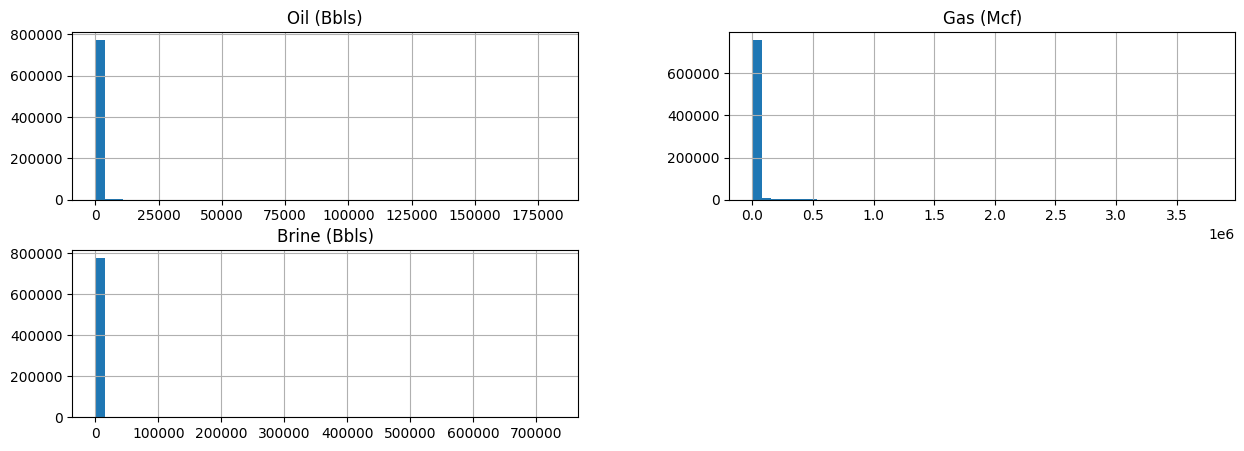

In [24]:
annual_production[['Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)']].hist(bins=50, figsize=(15, 5))
plt.show()

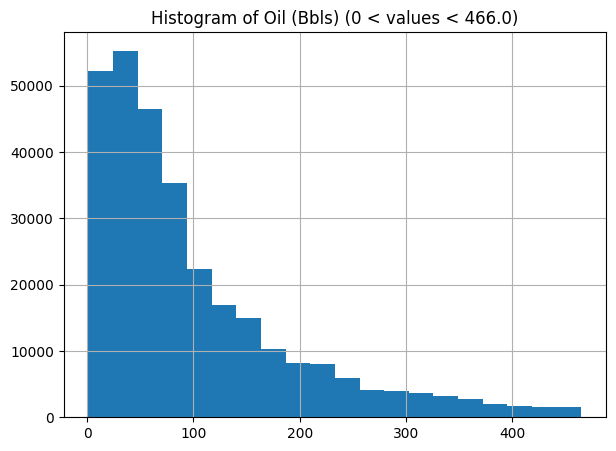

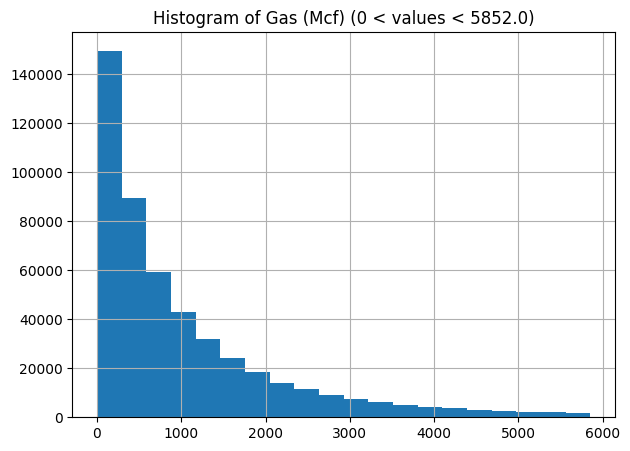

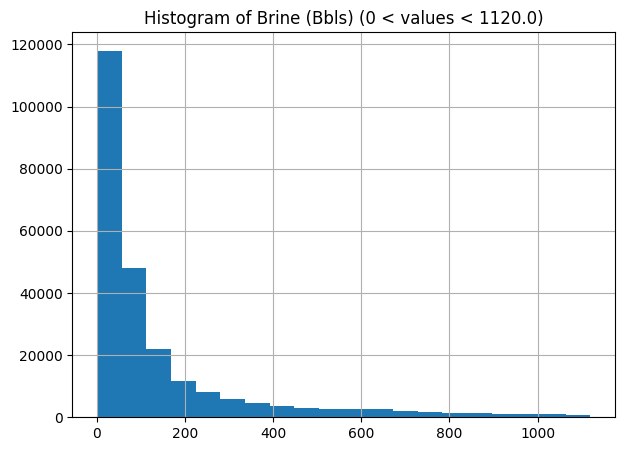

In [25]:
thresholds = {}
for col in ['Oil (Bbls)', 'Gas (Mcf)', 'Brine (Bbls)']:
    thresholds[col] = np.percentile(annual_production[col][annual_production[col] > 0], 90)
    annual_production.loc[(annual_production[col] > 0) & (annual_production[col] < thresholds[col]), col].hist(bins=20, figsize=(7, 5))
    plt.title(f'Histogram of {col} (0 < values < {thresholds[col]})')
    plt.show()

### Notes from Numerical Summary

* Notably, there are null values in the production columns for 1435 rows. Most of them have only one null column, so we can probably coalesce those to be 0.
* There are 27 rows with negative production values. We can remove these, and may want to consider removing these wells entirely.
* There are 100,000+ rows with quarterly values. We already have quarterly values for 2020 and beyond, but we should keep the quarterly values for 2019 and earlier.
  + 61,427 of these rows are accounted for already by `quarterly_production`.
  + After removing the non-null quarters for 2020 and beyond, there is no overlap between `quarterly_production` and `annual_production`.
* Like with quarterly production, over half of the rows have 0 for brine and oil.
* We can also see the same heavy right skew, even when filtering down to the bottom 90% of values.


### Combining Quarterly and Annual Data

Since the data has the same rows, we can combine the quarterly and annual data to be in one dataset. We can also separate the quarterly data that is currently stored in the annual dataset.

In [26]:
annual_and_quarterly = pd.concat([annual_production, quarterly_production], ignore_index=True) 
annual_final = annual_and_quarterly[annual_and_quarterly['Quarter (1, 2, 3, 4, n/a)'].isnull()]
quarterly_final = annual_and_quarterly[~annual_and_quarterly['Quarter (1, 2, 3, 4, n/a)'].isnull()]

In [29]:
# Write final datasets to CSV files
annual_final.to_csv('../data/final/annual_production_final.csv', index=False)
quarterly_final.to_csv('../data/final/quarterly_production_final.csv', index=False)
annual_and_quarterly.to_csv('../data/final/annual_and_quarterly_production_final.csv', index=False)

### Permit Plug List

We need to read in each file from the `permit_plug` folder.

In [44]:
# Read each file from the permit_plug folder.
import os

permit_plug_folder = '../data/permit_plug/'
permit_plug_files = [f for f in os.listdir(permit_plug_folder) if f.endswith('.xls')]

permit_plug_list = pd.concat([pd.read_excel(permit_plug_folder + f) for f in permit_plug_files], ignore_index=True)

WARNING *** file size (1022733) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (1796790) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (1195456) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (1667149) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (1692979) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (1797077) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (1441763) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT si

In [45]:
permit_plug_list.columns.to_list()

['NAME',
 'WH_LOT',
 'WH_SEC',
 'WH_LAT83',
 'WH_LONG83',
 'WH_LAT',
 'WH_LONG',
 'QUAD_NAME',
 'CONAME',
 'ADDR1',
 'ADDR2',
 'CITY',
 'STATE',
 'ZIP1',
 'PHONE',
 'CNTY_APINO',
 'WH_CV_TWPNO',
 'CV_TWPNM',
 'DT_APP_ISSUED',
 'APP_TYP',
 'APPNO',
 'DT_APP_RECVD',
 'YN_RUSH_APP',
 'RUSH_CHKNO',
 'RUSH_AMT',
 'APP_CHKNO',
 'FEE_AMT',
 'REVISED_AMT',
 'REVISED_CHKNO',
 'VARIANCE',
 'POOL_AMT',
 'OPNO',
 'CO_REP',
 'PM_ADDROK',
 'PM_CONTACT',
 'PM_ADDR1',
 'PM_ADDR2',
 'PM_CITY',
 'PM_STATE',
 'PM_ZIP1',
 'PM_ZIP2',
 'PM_COUNTRY',
 'PM_PHONENO',
 'EXIST_WELL',
 'LOCATION_ID',
 'WELLNM',
 'WELLNO',
 'DU_ACRES',
 'RIG_TYP',
 'FIRE_PHNO',
 'MEDL_PHNO',
 'PROP_WLTYPE',
 'PROP_TD',
 'PROP_WELL_CLASS',
 'PROPOSEDFORMATIONS',
 'ELEV_GR',
 'ELEV_TGT',
 'API_WELLNO',
 'WH_FTCALLS',
 'BH_LOT',
 'BH_SEC',
 'BH_FTCALLS',
 'BH_ALLOTMENT',
 'BH_X',
 'BH_Y',
 'BH_OGS_QUADCODE',
 'BH_CV_TWPNO',
 'QUAD_NAME_T',
 'APP_TYP_Description',
 'BH_CV_TWPNM',
 ' NAME']

This dataset has way too many columns. We are looking to use this exclusively to determine well type and well status, so we can limit the columns we use.

In [46]:
# Fill NA values in 'NAME' with values from ' NAME'
permit_plug_list['NAME'] = permit_plug_list[' NAME'].fillna(permit_plug_list['NAME'])

permit_plug_list = permit_plug_list[[
    'API_WELLNO', 'WH_LAT', 'WH_LONG', 'CONAME', 'DT_APP_ISSUED', 'DT_APP_RECVD',
    'APP_TYP', 'APPNO', 'EXIST_WELL', 'LOCATION_ID', 'RIG_TYP', 'PROP_WLTYPE',
    'PROP_WELL_CLASS', 'APP_TYP_Description'
]]

For this dataset, we are going to need a lot of client clarification about what any of these columns mean.

In [47]:
permit_plug_list.shape

(45474, 14)

In [48]:
# Count nulls in each column
permit_plug_list.isnull().sum()

API_WELLNO                 0
WH_LAT                  1706
WH_LONG                 1706
CONAME                     8
DT_APP_ISSUED              0
DT_APP_RECVD               0
APP_TYP                    0
APPNO                      0
EXIST_WELL                 0
LOCATION_ID                0
RIG_TYP                 2588
PROP_WLTYPE                3
PROP_WELL_CLASS        19791
APP_TYP_Description        4
dtype: int64

We see that we have some null values in WH_LAT and WH_LONG. We hope for those gaps to be filled in by the Well Information dataset. There are also lots of null values in the PROP_WELL_CLASS column, but few in the PROP_WLTYPE column.

In [53]:
permit_plug_list['PROP_WLTYPE'].value_counts()

PROP_WLTYPE
OG_R    43204
ST_R      948
GS_R      539
SW_R      414
ER_R      173
SM_R      132
UN_R       37
OG         10
BR_R        7
MN_R        6
SWD         1
Name: count, dtype: int64

In [54]:
permit_plug_list[permit_plug_list['PROP_WELL_CLASS'] == 'SWIW'].shape

(315, 14)

We need more clarification on the types and classes of wells, but it appears that of the 414 SWIWs, we have 315 with non-null well class.